# Linear Regression with Scikit Learn - Machine Learning with Python

This tutorial is a part of [Zero to Data Science Bootcamp by Jovian](https://zerotodatascience.com) and [Machine Learning with Python: Zero to GBMs](https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms)

![](https://i.imgur.com/1EzyZvj.png)


## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll define the terms _machine learning_ and _linear regression_ in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:


> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence. 
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
> 
> You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers. 
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets

## Downloading the Data

To begin, let's download the data using the `urlretrieve` function from `urllib.request`.

In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x2099bfab790>)

We can now create a Pandas dataframe using the downloaded file, to view and analyze the data.

In [4]:
import pandas as pd

In [5]:
url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [6]:
medical_df = pd.read_csv(url)

In [7]:
medical_df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [8]:
medical_df.shape

(1338, 7)

The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer. 

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

Let's check the data type for each column.

In [9]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like "age", "children", "bmi" ([body mass index](https://en.wikipedia.org/wiki/Body_mass_index)) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!

Here are some statistics for the numerical columns:

In [10]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

The ranges of values in the numerical columns seem reasonable too (no negative ages!), so we may not have to do much data cleaning or correction. The "charges" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.






Let's save our work before continuing.

In [11]:
import jovian

In [12]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mvbosamiya20/python-sklearn-linear-regression" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mvbosamiya20/python-sklearn-linear-regression


'https://jovian.ai/mvbosamiya20/python-sklearn-linear-regression'

## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization. Follow these tutorials to learn how to use these libraries: 

- https://jovian.ai/aakashns/python-matplotlib-data-visualization
- https://jovian.ai/aakashns/interactive-visualization-plotly
- https://jovian.ai/aakashns/dataviz-cheatsheet

In [12]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following settings will improve the default style and font sizes for our charts.

In [13]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [14]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [15]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the [number of people of any given age](https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/) (between 18 & 64) in the USA.




### Body Mass Index

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [16]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted ([source](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

![](https://i.imgur.com/lh23OiY.jpg)

> **EXERCISE**: Can you explain why the distribution of ages forms a uniform distribution while the distribution of BMIs forms a gaussian distribution?
>
> ???

### Charges

Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [17]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'goldenrod'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

* For most customers, the annual medical charges are under \\$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \\$7300, the median for smokers is close to \\$35,000.


> **EXERCISE**: Visualize the distribution of medical charges in connection with other factors like "sex" and "region". What do you observe?

In [18]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['goldenrod', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [19]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['green', 'red'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [20]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='children', 
                   color_discrete_sequence=['blue', 'black'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

### Smoker

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [21]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [22]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

It appears that 20% of customers have reported that they smoke. Can you verify whether this matches the national average, assuming the data was collected in 2010? We can also see that smoking appears a more common habit among males. Can you verify this?



> **EXERCISE**: Visualize the distributions of the "sex", "region" and "children" columns and report your observations. 

In [23]:
px.histogram(medical_df, x='smoker', color='region', title='Smoker')

In [24]:
px.histogram(medical_df, x='smoker', color='children', title='Smoker')

In [25]:
px.histogram(medical_df, x='sex', color='region', title='Smoker')

In [26]:
px.histogram(medical_df, x='smoker', color='region', title='Smoker')

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [27]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
    

### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [28]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

What other insights can you gather from the above graph?

> **EXERCISE**: Create some more graphs to visualize how the "charges" column is related to other columns ("children", "sex", "region" and "smoker"). Summarize the insights gathered from these graphs.
>
> *Hint*: Use violin plots (`px.violin`) and bar plots (`sns.barplot`)


In [29]:
px.violin(medical_df,x='bmi',y='charges',color='smoker')

In [30]:
px.violin(medical_df,x='smoker',y='charges',color='sex',title='Smoker vs Charges')

In [31]:
px.violin(medical_df,x='region',y='charges',color='sex',title='Region vs Charges Depended on Sex')

In [32]:
fig = px.violin(medical_df,x='region',y='charges',color='smoker',title='Region vs Charges')
fig.show()

In [33]:
fig = px.violin(medical_df,x='children',y='charges',title='Childern vs Charges')
fig.show()

### Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [34]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [35]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [36]:
medical_df.charges.corr(medical_df.children)

0.06799822684790487

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [37]:
def smoker_values(x):
    if(x=='yes'):
        x=1
    else:
        x=0
    return x
smoker_numeric = medical_df.smoker.apply(smoker_values)

In [38]:
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [39]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984778




Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">

You can learn more about the mathematical definition and geometric interpretation of correlation here: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

In [40]:
medical_df_copy = medical_df.copy()

In [41]:
medical_df_copy.smoker.apply(smoker_values)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [42]:
medical_df_copy['x']=medical_df_copy.smoker.apply(smoker_values)

In [43]:
medical_df_copy = medical_df_copy.rename(columns={'x':'Smoke'})

In [44]:
medical_df_copy.corr()

age       bmi  children   charges     Smoke
age       1.000000  0.109272  0.042469  0.299008 -0.025019
bmi       0.109272  1.000000  0.012759  0.198341  0.003750
children  0.042469  0.012759  1.000000  0.067998  0.007673
charges   0.299008  0.198341  0.067998  1.000000  0.787251
Smoke    -0.025019  0.003750  0.007673  0.787251  1.000000

In [45]:
px.imshow(medical_df_copy.corr())

In [46]:
medical_df.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

The result of `.corr` is called a correlation matrix and is often visualized using a heatmap.

In [47]:
px.imshow(medical_df.corr(),color_continuous_scale='reds')

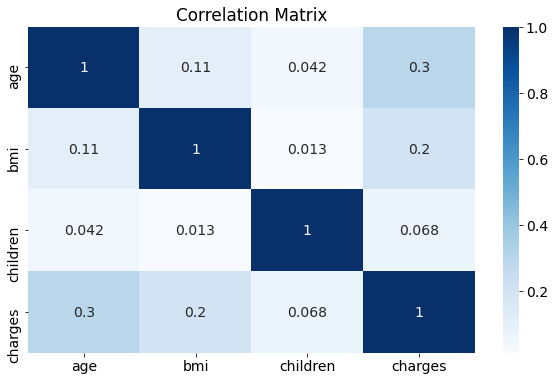

In [48]:
sns.heatmap(medical_df.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

**Correlation vs causation fallacy:** Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features $X$ and $Y$ can be correlated if $X$ causes $Y$ or if $Y$ causes $X$, or if both are caused independently by some other factor $Z$, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that $X$ are $Y$ simply appear to be correlated because the sample is too small. 

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

Let's save our work before continuing.

In [49]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mvbosamiya20/python-sklearn-linear-regression" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mvbosamiya20/python-sklearn-linear-regression


'https://jovian.ai/mvbosamiya20/python-sklearn-linear-regression'

## Linear Regression using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [49]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

Next, let's visualize the relationship between "age" and "charges"

In [50]:
px.scatter(non_smoker_df,x='age',y='charges',trendline='ols')

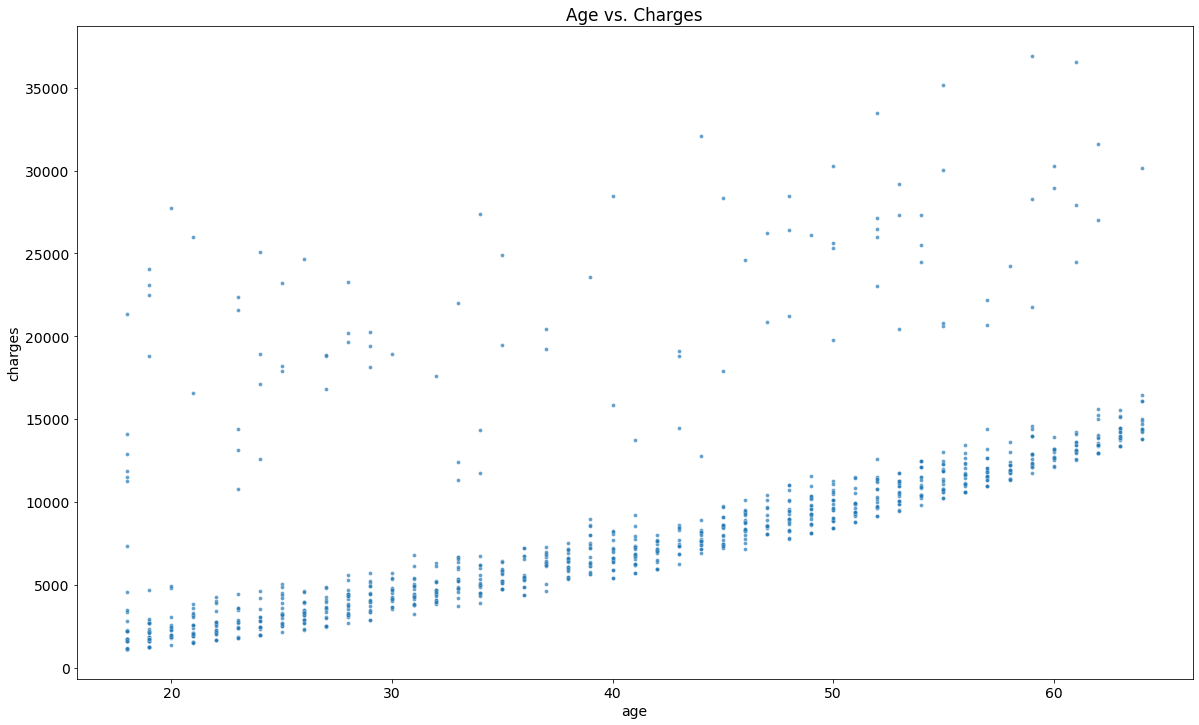

In [51]:
plt.figure(figsize=(20,12))
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

$y = mx + b$

The line is characterized two numbers: $w$ (called "slope") and $b$ (called "intercept"). 

### Model

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assume the following relationship between the two:

$charges = m \times age + b$

We'll try determine $m$ and $b$ for the line that best fits the data. 

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "age" and "charges" as a straight line. 

* The numbers $m$ and $b$ are called the _parameters_ or _weights_ of the model.

* The values in the "age" column of the dataset are called the _inputs_ to the model and the values in the charges column are called "targets". 

Let define a helper function `estimate_charges`, to compute $charges$, given $age$, $m$ and $b$.


In [52]:
def estimate_charges(age, w, b):
    return w * age + b

The `estimate_charges` function is our very first _model_.

Let's _guess_ the values for $w$ and $b$ and use them to estimate the value for charges.

In [53]:
w = 50
b = 1000

In [54]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

In [55]:
estimated_charges

1       1900
2       2400
3       2650
4       2600
5       2550
        ... 
1332    3600
1333    3500
1334    1900
1335    1900
1336    2050
Name: age, Length: 1064, dtype: int64

We can plot the estimated charges using a line graph.

In [56]:
sns.set_style('whitegrid')

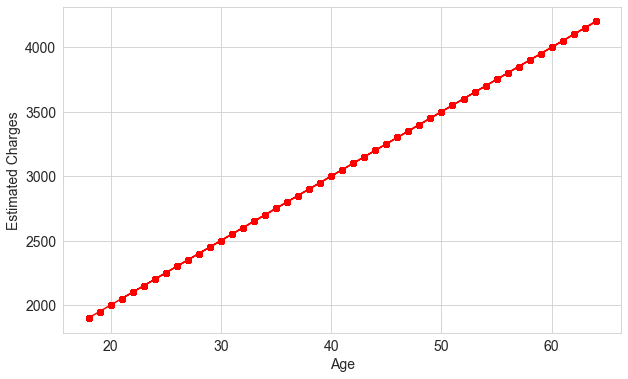

In [57]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

As expected, the points lie on a straight line. 

We can overlay this line on the actual data, so see how well our _model_ fits the _data_.

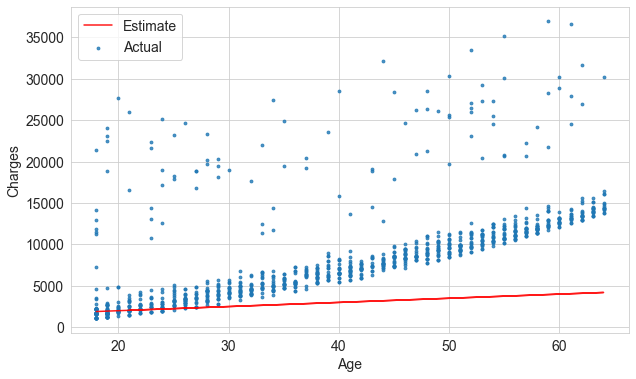

In [58]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of $w$ and $b$ to move the line around. Let's define a helper function `try_parameters` which takes `w` and `b` as inputs and creates the above plot.

In [59]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

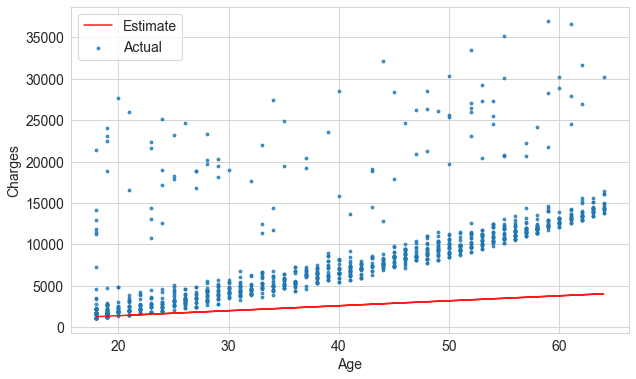

In [60]:
try_parameters(60, 200)

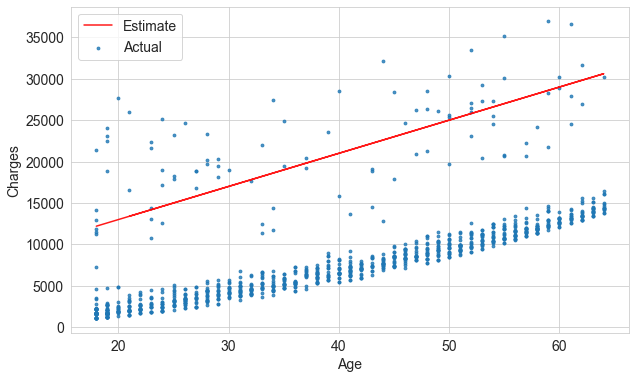

In [61]:
try_parameters(400, 5000)

> **EXERCISE**: Try various values of $w$ and $b$ to find a line that best fits the data. What is the effect of changing the value of $w$? What is the effect of changing $b$?

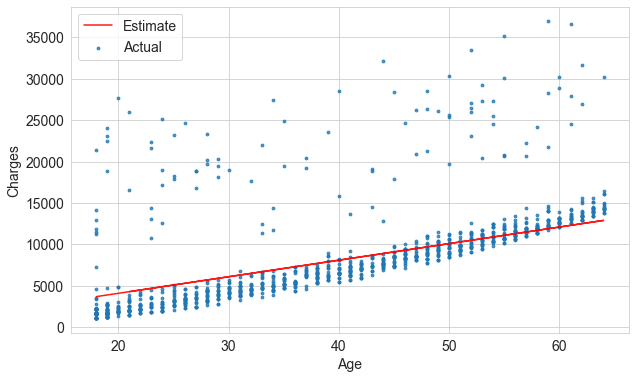

In [62]:
try_parameters(200, 100)

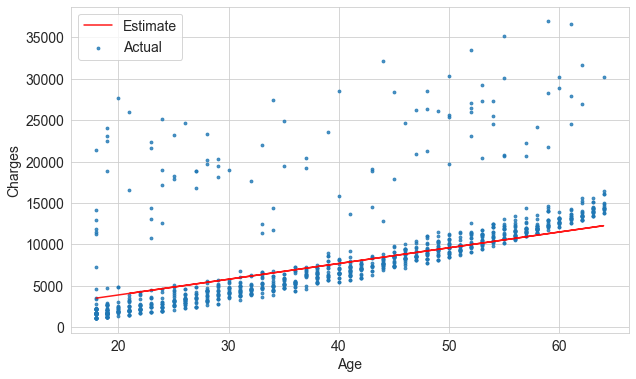

In [63]:
try_parameters(190, 100)

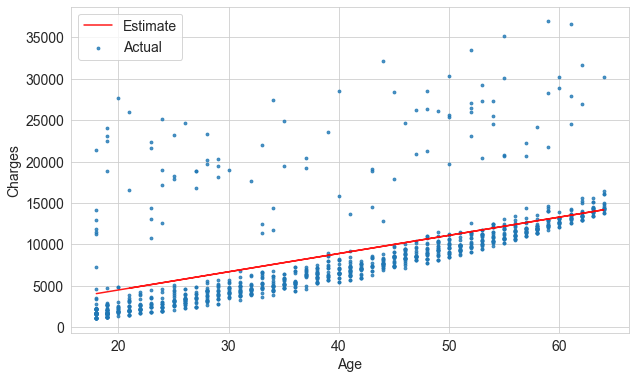

In [64]:
try_parameters(220, 100)

As we change the values, of $w$ and $b$ manually, trying to move the line visually closer to the points, we are _learning_ the approximate relationship between "age" and "charges". 

Wouldn't it be nice if a computer could try several different values of `w` and `b` and _learn_ the relationship between "age" and "charges"? To do this, we need to solve a couple of problems:

1. We need a way to measure numerically how well the line fits the points.

2. Once the "measure of fit" has been computed, we need a way to modify `w` and `b` to improve the the fit.

If we can solve the above problems, it should be possible for a computer to determine `w` and `b` for the best fit line, starting from a random guess.

### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference to remove negative values.
* Calculate the average of the elements in the resulting.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows: 

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

In [65]:
import numpy as np

In [66]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

Let's compute the RMSE for our model with a sample set of weights

In [67]:
w = 50
b = 100

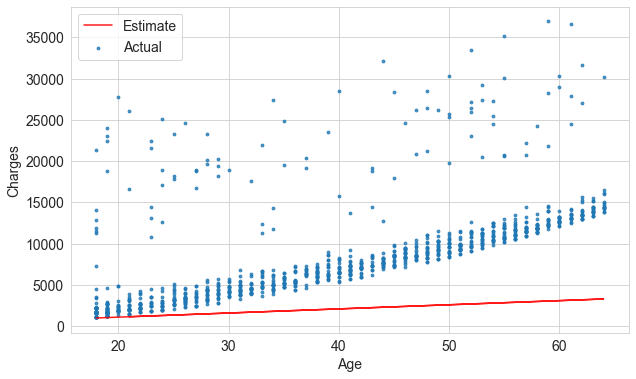

In [68]:
try_parameters(w, b)

In [69]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [70]:
rmse(targets, predicted)

8461.949562575488

Here's how we can interpret the above number: *On average, each element in the prediction differs from the actual target by \\$8461*. 

The result is called the *loss* because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

Let's modify the `try_parameters` functions to also display the loss.

In [71]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575488


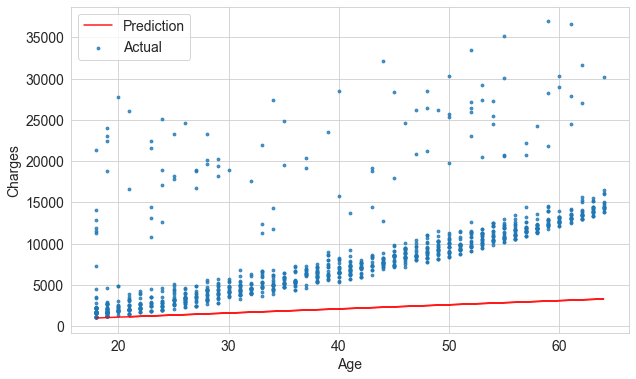

In [72]:
try_parameters(50, 100)

> **EXERCISE**: Try different values of $w$ and $b$ to minimize the RMSE loss. What's the lowest value of loss you are able to achieve? Can you come with a general strategy for finding better values of $w$ and $b$ by trial and error?

RMSE Loss:  4779.554003723564


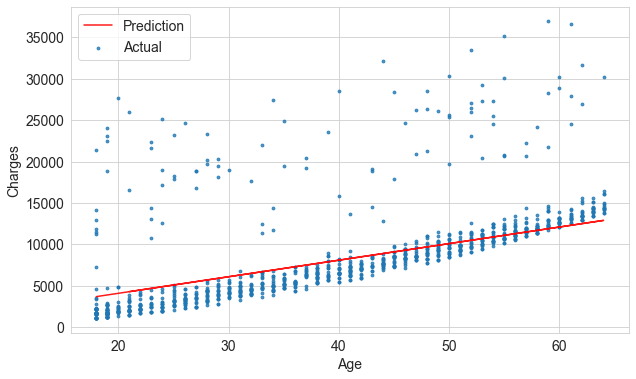

In [73]:
try_parameters(200, 100)

RMSE Loss:  4802.813417777466


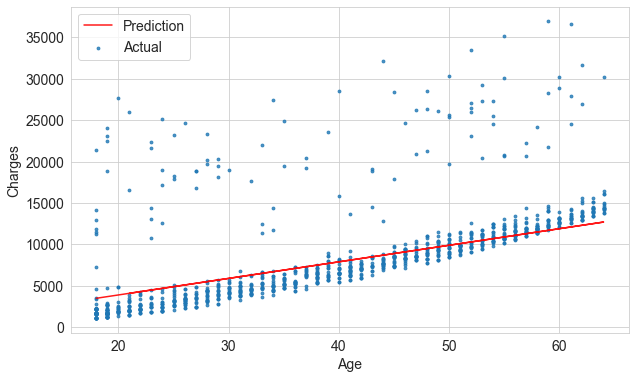

In [74]:
try_parameters(200, -100)

RMSE Loss:  4873.3012270564295


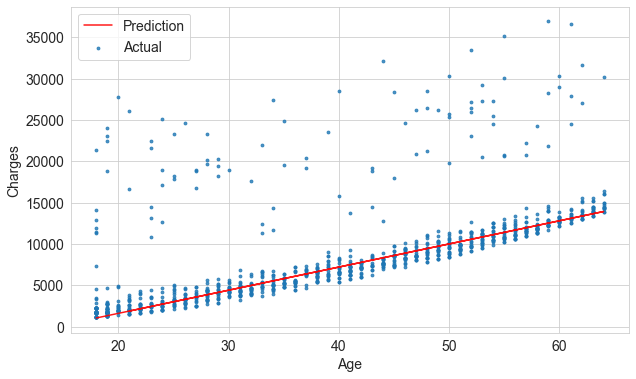

In [75]:
try_parameters(280, -4000)

RMSE Loss:  4662.5165244874015


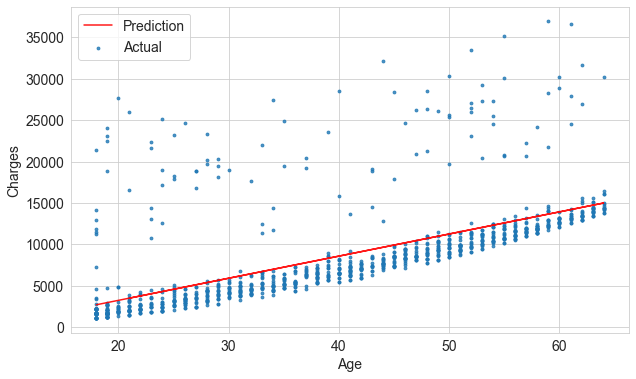

In [76]:
try_parameters(267,-2091)

## Improve not by looking at graph but by values

If you have a weight, if you have a certain w and a certain B try slightly increasing w if diet reduces the loss, then you can increase w by a large amount, if that does not reduce the loss price slightly decreasing, w if that reduces the loss, then maybe you can reduce w by a significant amount, if that does not help try the same with B, or maybe try the same with WNB in parallel

### Optimizer

Next, we need a strategy to modify weights `w` and `b` to reduce the loss and improve the "fit" of the line to the data.

* Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets)
* Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for `w` and `b` using matrix operations, while gradient descent uses a iterative approach, starting with a random values of `w` and `b` and slowly improving them using derivatives. 

Here's a visualization of how gradient descent works:

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)

Doesn't it look similar to our own strategy of gradually moving the line closer to the points?



### Linear Regression using Scikit-learn

In practice, you'll never need to implement either of the above methods yourself. You can use a library like `scikit-learn` to do this for you. 

Let's use the `LinearRegression` class from `scikit-learn` to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique.

In [77]:
from sklearn.linear_model import LinearRegression

First, we create a new model object.

In [78]:
model = LinearRegression()

Next, we can use the `fit` method of the model to find the best fit line for the inputs and targets.

In [79]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



Not that the input `X` must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.

In [80]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


Let's fit the model to the data.

In [81]:
model.fit(inputs, targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61

In [82]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

Do these values seem reasonable? Compare them with the scatter plot above.

Let compute the predictions for the entire set of inputs

In [83]:
predictions = model.predict(inputs)

In [84]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

Let's compute the RMSE loss to evaluate the model.

In [85]:
rmse(targets, predictions)

4662.505766636391

Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.

The parameters of the model are stored in the `coef_` and `intercept_` properties.

In [86]:
# w
model.coef_

array([267.24891283])

In [87]:
# b
model.intercept_

-2091.4205565650827

Are these parameters close to your best guesses?

Let's visualize the line created by the above parameters.

RMSE Loss:  4662.505766636391


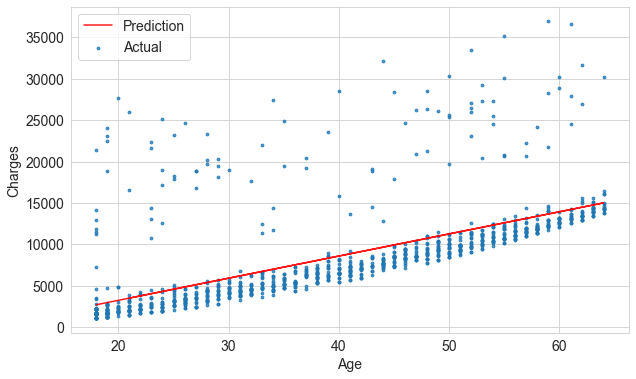

In [88]:
try_parameters(model.coef_, model.intercept_)

Indeed the line is quite close to the points. It is slightly above the cluster of points, because it's also trying to account for the outliers. 

> **EXERCISE**: Use the [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) class from `scikit-learn` to train a model using the stochastic gradient descent technique. Make predictions and compute the loss. Do you see any difference in the result?

In [89]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [90]:
model = SGDRegressor()

In [91]:
help(model.fit)

Help on method fit in module sklearn.linear_model._stochastic_gradient:

fit(X, y, coef_init=None, intercept_init=None, sample_weight=None) method of sklearn.linear_model._stochastic_gradient.SGDRegressor instance
    Fit linear model with Stochastic Gradient Descent.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training data
    
    y : ndarray of shape (n_samples,)
        Target values
    
    coef_init : ndarray of shape (n_features,), default=None
        The initial coefficients to warm-start the optimization.
    
    intercept_init : ndarray of shape (1,), default=None
        The initial intercept to warm-start the optimization.
    
    sample_weight : array-like, shape (n_samples,), default=None
        Weights applied to individual samples (1. for unweighted).
    
    Returns
    -------
    self : returns an instance of self.



In [92]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

In [93]:
model.fit(inputs,targets)

SGDRegressor()

In [94]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

array([ 2266.43711289,  7646.96781512, 16870.73473323])

In [95]:
pred = model.predict(inputs)

In [96]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [97]:
rmse(targets,pred)

4946.891768756242

RMSE Loss:  4946.891768756242


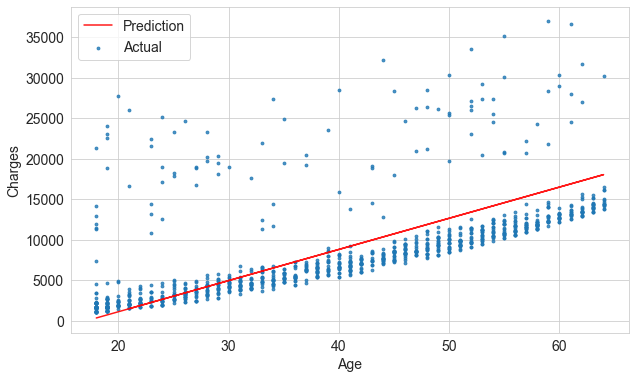

In [98]:
x = model.coef_
y = model.intercept_
try_parameters(x,y)

> **EXERCISE**: Repeat the steps is this section to train a linear regression model to estimate medical charges for smokers. Visualize the targets and predictions, and compute the loss.

In [99]:
medical_df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [100]:
smokers_df = medical_df[medical_df.smoker == 'yes']

In [101]:
smokers_df.describe()

age         bmi    children       charges
count  274.000000  274.000000  274.000000    274.000000
mean    38.514599   30.708449    1.113139  32050.231832
std     13.923186    6.318644    1.157066  11541.547176
min     18.000000   17.195000    0.000000  12829.455100
25%     27.000000   26.083750    0.000000  20826.244213
50%     38.000000   30.447500    1.000000  34456.348450
75%     49.000000   35.200000    2.000000  41019.207275
max     64.000000   52.580000    5.000000  63770.428010

In [102]:
ages = smokers_df.age
estimated_charges = estimate_charges(ages, w, b)

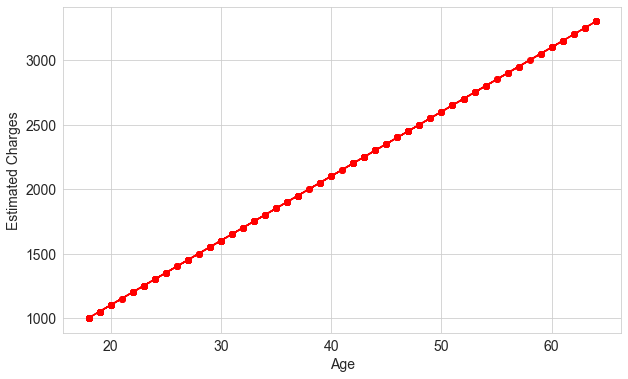

In [103]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

In [104]:
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [105]:
ages

0       19
11      62
14      27
19      30
23      34
        ..
1313    19
1314    30
1321    62
1323    42
1337    61
Name: age, Length: 274, dtype: int64

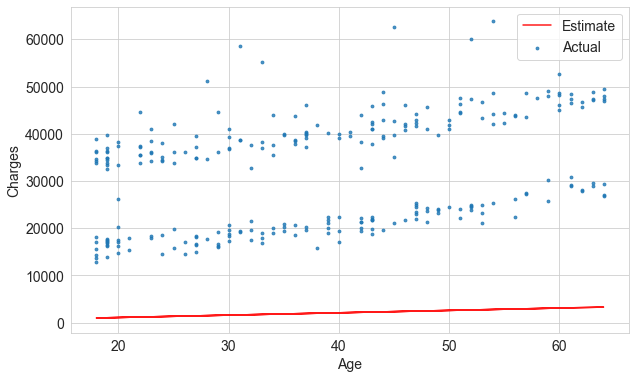

In [106]:
target = smokers_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [107]:
model = LinearRegression()

In [108]:
inputs = smokers_df[['age']]

In [109]:
target = smokers_df.charges

In [110]:
target

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [111]:
inputs

age
0      19
11     62
14     27
19     30
23     34
...   ...
1313   19
1314   30
1321   62
1323   42
1337   61

[274 rows x 1 columns]

In [112]:
model.fit(inputs,target)

LinearRegression()

In [113]:
pred = model.predict(inputs)

In [114]:
rmse(pred,target)

10711.00334810241

In [115]:
model = SGDRegressor()

In [116]:
model.fit(inputs,target)

SGDRegressor()

In [117]:
x=model.predict(inputs)

In [118]:
x_=model.intercept_
y_=model.coef_

In [119]:
x_

array([4.21971072e+09])

In [120]:
y_

array([-1.20007708e+08])

In [121]:
rmse(pred,target)

10711.00334810241

In [122]:
def try_parameters2(w, b):
    ages = smokers_df.age
    target = smokers_df.charges
    pred = estimate_charges(ages, w, b)
    
    plt.plot(ages, pred, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  176377916855.65042


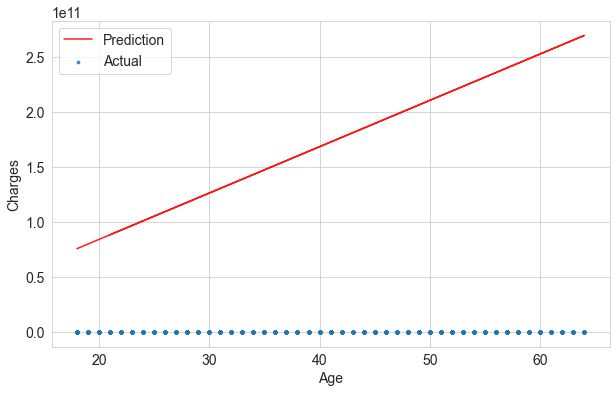

In [123]:
try_parameters(x_,y_)

### Machine Learning

Congratulations, you've just trained your first _machine learning model!_ Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets. 

Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

We'll look at several examples of each of the above in future tutorials. Here's how the relationship between these three components can be visualized:

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

As we've seen above, it takes just a few lines of code to train a machine learning model using `scikit-learn`.

In [124]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636391


In [125]:
from sklearn import linear_model

In [126]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = linear_model.HuberRegressor().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4845.2775384736915


Let's save our work before continuing.

In [127]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mvbosamiya20/python-sklearn-linear-regression" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mvbosamiya20/python-sklearn-linear-regression


'https://jovian.ai/mvbosamiya20/python-sklearn-linear-regression'

## Linear Regression using Multiple Features

So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times age + w_2 \times bmi + b$

We need to change just one line of code to include the BMI.

In [128]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.312835461298


As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [129]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833271

In [130]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can also visualize the relationship between all 3 variables "age", "bmi" and "charges" using a 3D scatter plot.

In [131]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

You can see that it's harder to interpret a 3D scatter plot compared to a 2D scatter plot. As we add more features, it becomes impossible to visualize all feature at once, which is why we use measures like correlation and loss. 

Let's also check the parameters of the model.

In [132]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488672)

Clearly, BMI has a much lower weightage, and you can see why. It has a tiny contribution, and even that is probably accidental. This is an important thing to keep in mind: you can't find a relationship that doesn't exist, no matter what machine learning technique or optimization algorithm you apply. 

> **EXERCISE**: Train a linear regression model to estimate charges using BMI alone. Do you expect it to be better or worse than the previously trained models?

In [133]:
inputs = non_smoker_df[['age']]
target = non_smoker_df['charges']

In [134]:
model = LinearRegression()

In [135]:
model.fit(inputs, target)

LinearRegression()

In [136]:
pred = model.predict(inputs)

In [137]:
pred

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [138]:
loss = rmse(target, pred)
print('Loss:', loss)

Loss: 4662.505766636391


Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$

In [139]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542205

In [140]:
fig = px.violin(non_smoker_df, x='children', y='charges', title='Children vs Charges')
fig.show()

In [141]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [142]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038245


Once again, we don't see a big reduction in the loss, even though it's greater than in the case of BMI.

> **EXERCISE**: Repeat the steps is this section to train a linear regression model to estimate medical charges for smokers. Visualize the targets and predictions, and compute the loss.

In [143]:
# Create inputs and targets
inputs, targets = smokers_df[['age', 'bmi', 'children']], smokers_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 5718.202480524153


> **EXERCISE**: Repeat the steps is this section to train a linear regression model to estimate medical charges for all customers. Visualize the targets and predictions, and compute the loss. Is the loss lower or higher?

In [144]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125969


Let's save our work before continuing.

In [161]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mvbosamiya20/python-sklearn-linear-regression" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mvbosamiya20/python-sklearn-linear-regression


'https://jovian.ai/mvbosamiya20/python-sklearn-linear-regression'

## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals




## Binary Categories

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".


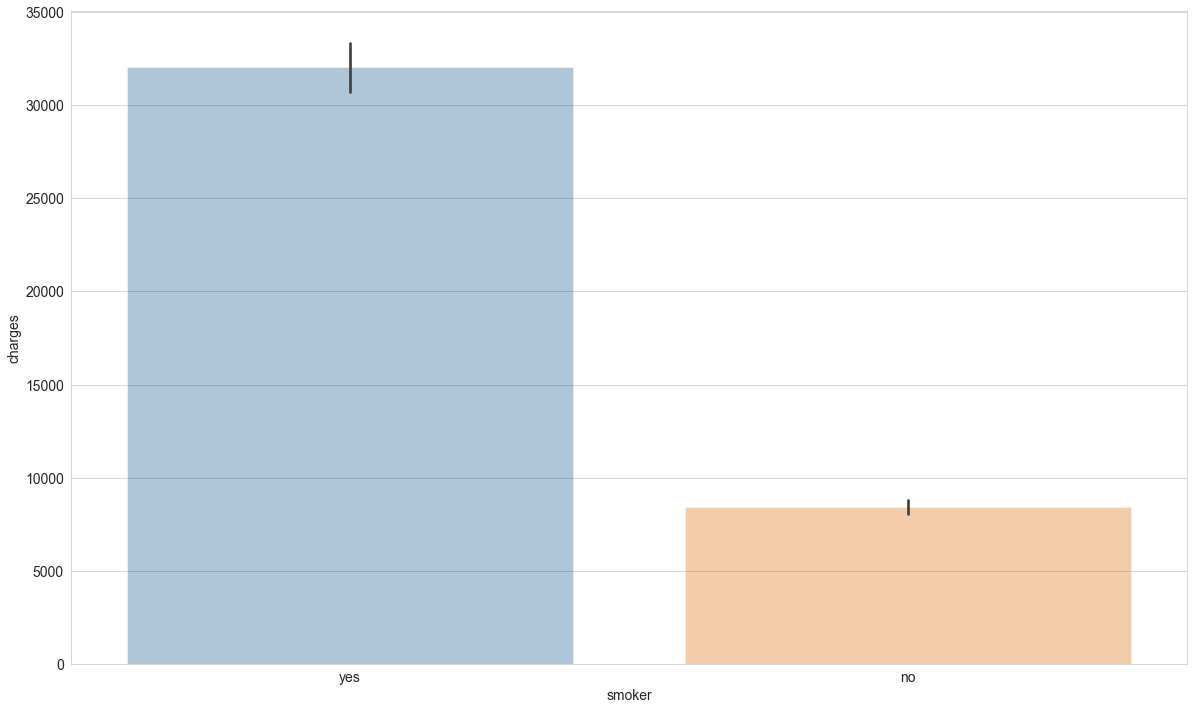

In [145]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))
sns.barplot(data=medical_df, x='smoker', y='charges',alpha=0.4);

In [146]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [147]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984778

In [148]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  
0               1  
1               0  
2               0  
3               0  
4               0  
...           ...  
1333            0  
1334            0  
1335            0  
1336            0  
1337            1  

[1338 rows x 8 columns]

We can now use the `smoker_code` column for linear regression.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + b$

In [149]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188079


The loss reduces from `11355` to `6056`, almost by 50%! This is an important lesson: never ignore categorical data.


Let's try adding the "sex" column as well.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + b$

<AxesSubplot:xlabel='sex', ylabel='charges'>

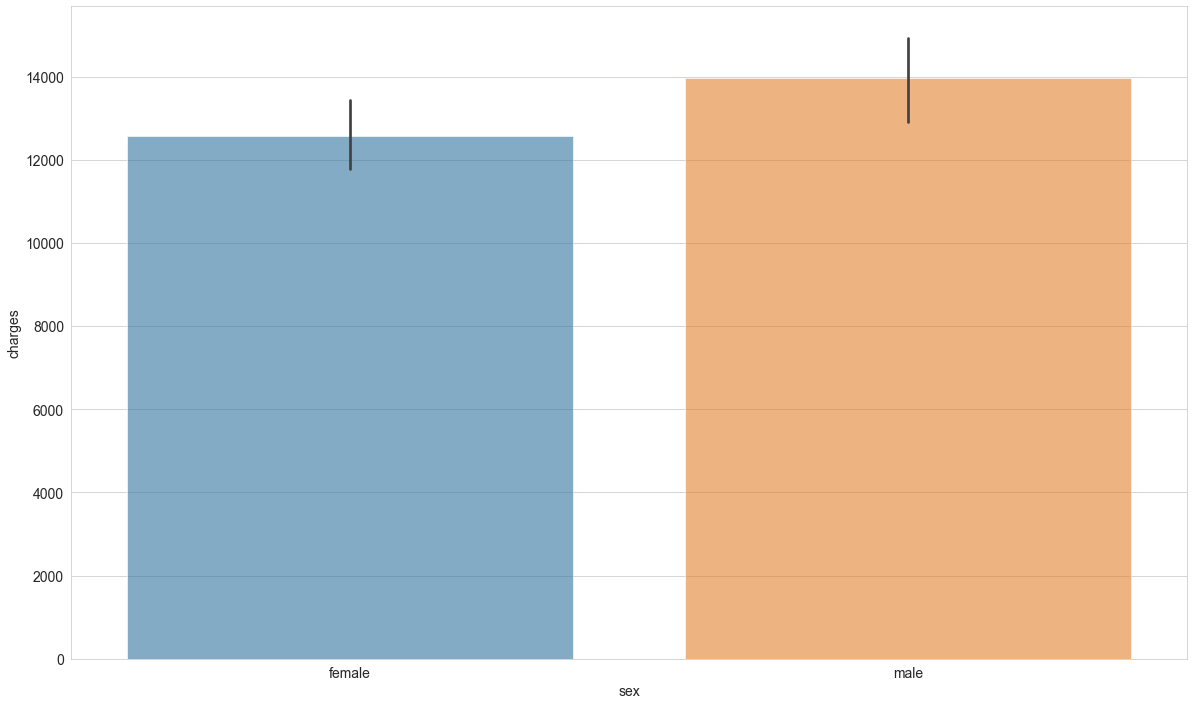

In [160]:
plt.figure(figsize=(20,12))
sns.barplot(data=medical_df, x='sex', y='charges',alpha=0.6)

In [151]:
sex_codes = {'female': 0, 'male': 1}

In [152]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [153]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  
0               1         0  
1               0         1  
2               0         1  
3               0         1  
4               0         1  
...           ...       ...  
1333            0         1  
1334            0         0  
1335            0         0  
1336            0         0  
1337            1         0  

[1338 rows x 9 columns]

In [154]:
medical_df.charges.corr(medical_df.sex_code)

0.05729206220202533

In [155]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754538


As you might expect, this does not have a significant impact on the loss.


### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)


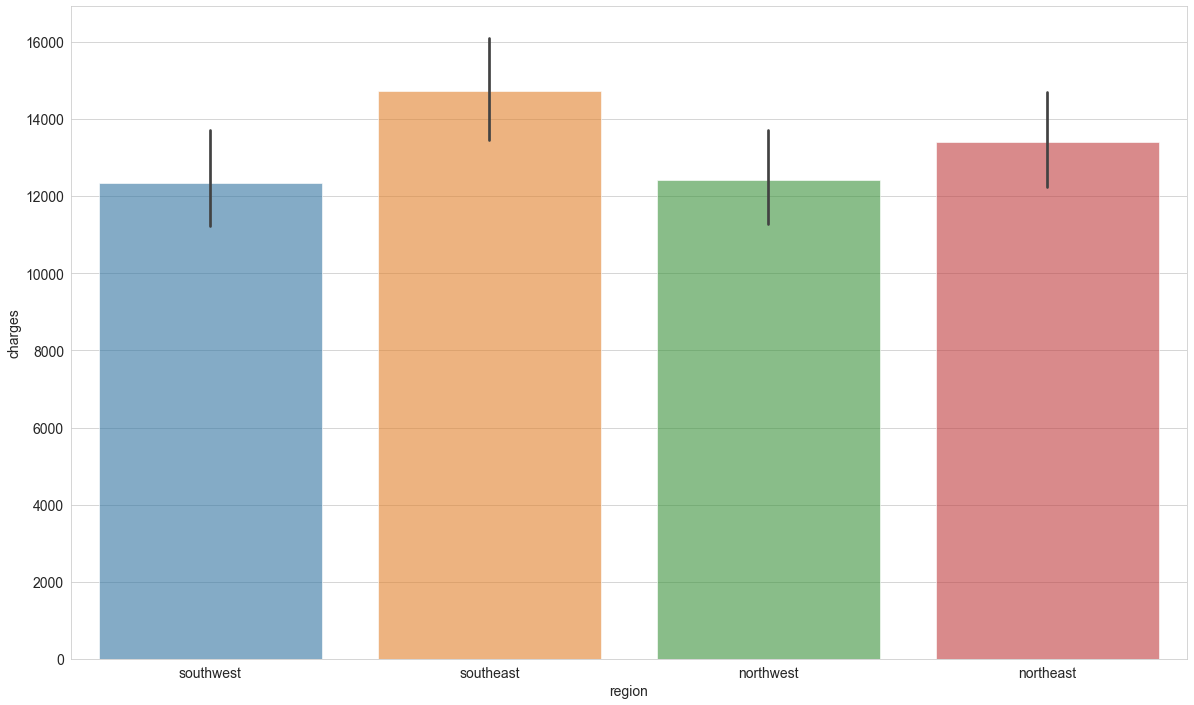

In [161]:
plt.figure(figsize=(20,12))
sns.barplot(data=medical_df, x='region', y='charges',alpha=0.6);

In [162]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [163]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [164]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [165]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  northeast  northwest  southeast  southwest  
0               1         0        0.0        0.0        0.0        1.0  
1               0         1        0.0        0.0        1.0        0.0  
2               0         1        0.0        0.0        1.0        0.0  
3               0         1        0.0        1.0        0.0        0.0  
4               0         1        0.0        1.0        0.0        0.0  
...           ...       ...        ...        ...        ...        ...  
1333            0         1        0.0        1.0        0.0        0.0  
1334            0         0        1.0        0.0        0.0        0.0  
1335            0         0        0.0        0.0        1.0        0.0  
1336            0         0        0.0        0.0        0.0        1.0  
1337            1         0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

Let's include the region columns into our linear regression model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [173]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174454


Once again, this leads to a fairly small reduction in the loss. 

> **EXERCISE**: Are two separate linear regression models, one for smokers and one of non-smokers, better than a single linear regression model? Why or why not? Try it out and see if you can justify your answer with data.

In [167]:
smokers_df.head()

age     sex    bmi  children smoker     region     charges
0    19  female  27.90         0    yes  southwest  16884.9240
11   62  female  26.29         0    yes  southeast  27808.7251
14   27    male  42.13         0    yes  southeast  39611.7577
19   30    male  35.30         0    yes  southwest  36837.4670
23   34  female  31.92         1    yes  northeast  37701.8768

In [168]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children']
inputs, targets = smokers_df[input_cols], smokers_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 5718.202480524153


In [169]:
non_smoker_df

age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
...   ...     ...     ...       ...    ...        ...          ...
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500

[1064 rows x 7 columns]

In [170]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children']
inputs, targets = non_smoker_df[input_cols], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038245


Let's save our work before continuing.

In [171]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mvbosamiya20/python-sklearn-linear-regression" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mvbosamiya20/python-sklearn-linear-regression


'https://jovian.ai/mvbosamiya20/python-sklearn-linear-regression'

## Model Improvements

Let's discuss and apply some more improvements to our model.

### Feature Scaling

Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model. 

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

To compare the importance of each feature in the model, our first instinct might be to compare their weights. 

In [174]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [175]:
model.intercept_

-12525.54781119544

In [183]:
weights_df = pd.DataFrame({
    'Feature': np.append(input_cols,1),
    'Weight': np.append(model.coef_, model.intercept_)
})
weights_df

Feature        Weight
0          age    256.856353
1          bmi    339.193454
2     children    475.500545
3  smoker_code  23848.534542
4     sex_code   -131.314359
5    northeast    587.009235
6    northwest    234.045336
7    southeast   -448.012814
8    southwest   -373.041756
9            1 -12525.547811

While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [184]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  northeast  northwest  southeast  southwest  
0               1         0        0.0        0.0        0.0        1.0  
1               0         1        0.0        0.0        1.0        0.0  
2               0         1        0.0        0.0        1.0        0.0  
3               0         1        0.0        1.0        0.0        0.0  
4               0         1        0.0        1.0        0.0        0.0  
...           ...       ...        ...        ...        ...        ...  
1333            0         1        0.0        1.0        0.0        0.0  
1334            0         0        1.0        0.0        0.0        0.0  
1335            0         0        0.0        0.0        1.0        0.0  
1336            0         0        0.0        0.0        0.0        1.0  
1337            1         0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

In [185]:
from sklearn.preprocessing import StandardScaler

In [186]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [187]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [188]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

We can now scale data as follows:

In [189]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

These can now we combined with the categorical data

In [190]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [196]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174453


We can now compare the weights in the formula:

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [197]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

feature        weight
3  smoker_code  23848.534542
9            1   8466.483215
0          age   3607.472736
1          bmi   2067.691966
5    northeast    587.009235
2     children    572.998210
6    northwest    234.045336
4     sex_code   -131.314359
8    southwest   -373.041756
7    southeast   -448.012814

As you can see now, the most important feature are:

1. Smoker
2. Age
3. BMI


### Creating a Test Set

Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [200]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5859.132580004579


Let's compare this with the training loss.

In [201]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6066.847552557955


Can you explain why the training loss is lower than the test loss? We'll discuss this in a lot more detail in future tutorials.

### How to Approach a Machine Learning Problem

Here's a strategy you can apply to approach any machine learning problem:

1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss

We'll apply this process to several problems in future tutorials.

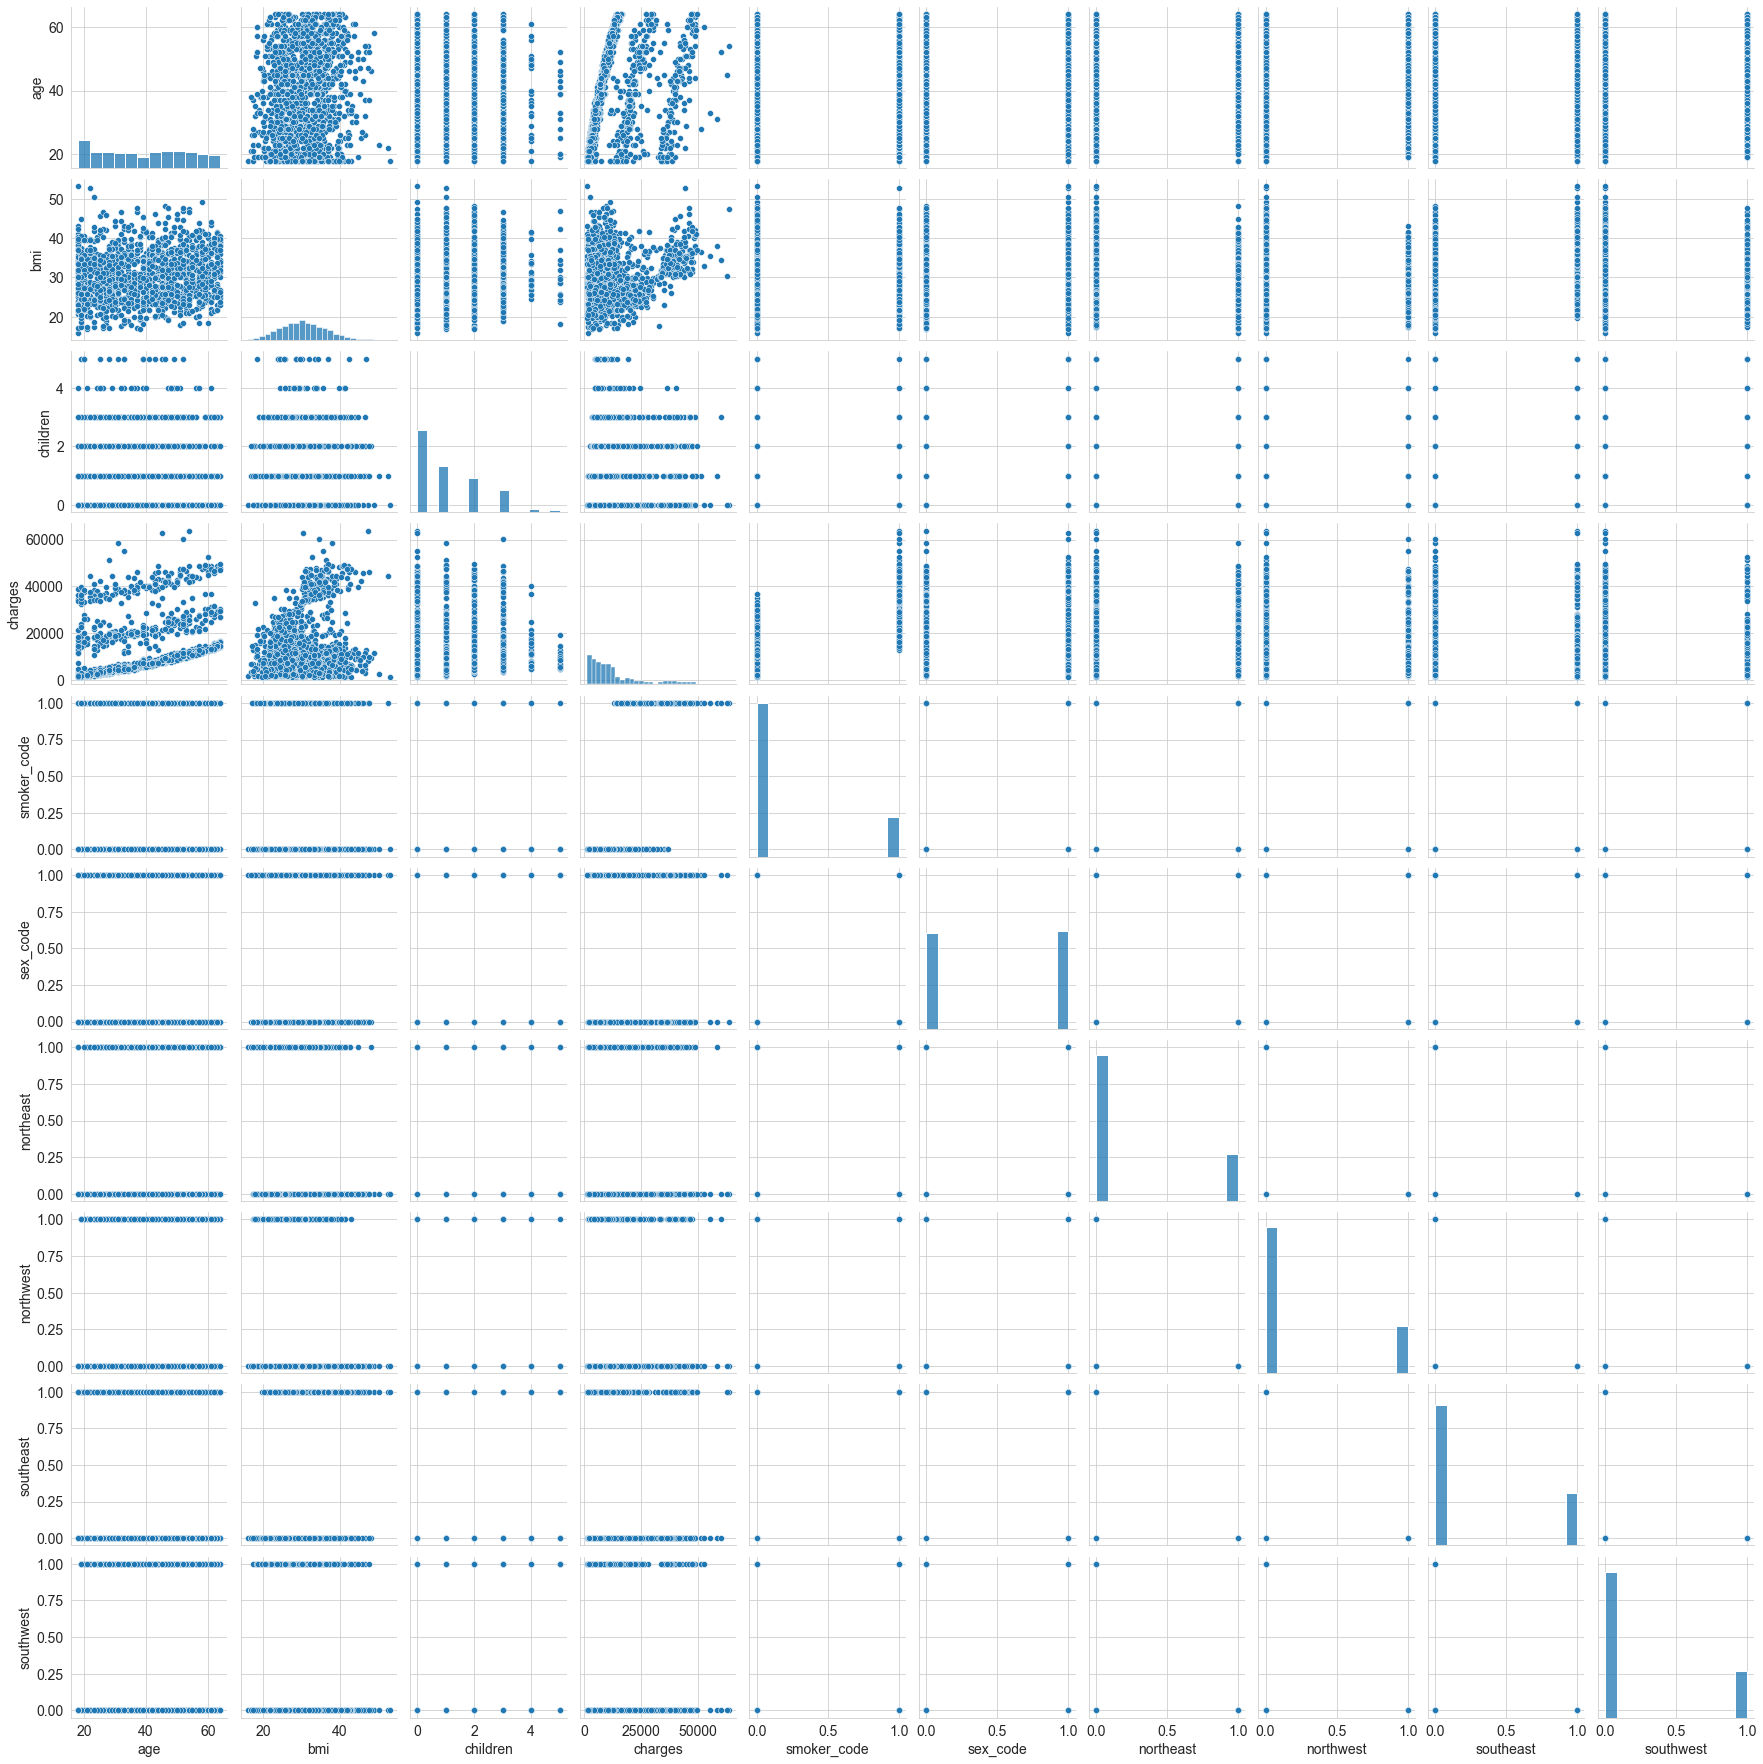

In [203]:
sns.pairplot(medical_df)

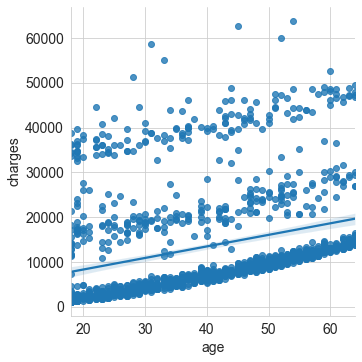

In [209]:
sns.lmplot(data=medical_df,x='age',y='charges');

Let's save our work before continuing.

In [210]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mvbosamiya20/python-sklearn-linear-regression" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mvbosamiya20/python-sklearn-linear-regression


'https://jovian.ai/mvbosamiya20/python-sklearn-linear-regression'

## Summary and Further Reading

We've covered the following topics in this tutorial:

- A typical problem statement for machine learning
- Downloading and exploring a dataset for machine learning
- Linear regression with one variable using Scikit-learn
- Linear regression with multiple variables 
- Using categorical features for machine learning
- Regression coefficients and feature importance
- Creating a training and test set for reporting results

Apply the techniques covered in this tutorial to the following datasets:

- https://www.kaggle.com/vikrishnan/boston-house-prices
- https://www.kaggle.com/sohier/calcofi
- https://www.kaggle.com/budincsevity/szeged-weather 


Check out the following links to learn more about linear regression:

- https://jovian.ai/aakashns/02-linear-regression
- https://www.kaggle.com/hely333/eda-regression
- https://www.youtube.com/watch?v=kHwlB_j7Hkc



## Revision Questions
1.	Why do we have to perform EDA before fitting a model to the data?
2.	What is a parameter?
3.	What is correlation?
4.	What does negative correlation mean?
5.	How can you find correlation between variables in Python?
6.	What is causation? Explain difference between correlation and causation with an example.
7.	Define Linear Regression.
8.	What is univariate linear regression?
9.	What is multivariate linear regression?
10.	What are weights and bias?
11.	What are inputs and targets?
12.	What is loss/cost function?
13.	What is residual? 
14.	What is RMSE value? When and why do we use it?
15.	What is an Optimizer? What are different types of optimizers? Explain each with an example.
16.	What library is available in Python to perform Linear Regression?
17.	What is <code>sklearn.linear_model </code>?
18.	What does <code>model.fit()</code> do? What arguments must be given?
19.	What does <code>model.predict()</code> do? What arguments must be given?
20.	How do we calculate RMSE values?
21.	What is <code>model.coef_</code>?
22.	What is <code>model.intercept_</code>?
23.	What is SGDRegressor? How is it different from Linear Regression?
24.	Define Machine Learning. What are the main components in Machine Learning?
25.	How does loss value help in determining whether the model is good or not?
26.	What are continuous and categorical variables?
27.	How do we handle categorical variables in Machine Learning? What are the common techniques?
28.	What is feature scaling? How does it help in Machine Learning?
29.	How do we perform scaling in Python?
30.	What is <code>sklearn.preprocessing</code>?
31.	What is a Test set?
32.	How do we split data for model fitting (training and testing) in Python?
33.	How do you approach a Machine Learning problem?